#  Data resources

Data is collected from 4 different sources.

1. AEMO website: National Electricity Data 
https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

2. ABS website: Population and Employment Statistics
https://www.abs.gov.au/websitedbs/D3310114.nsf/Home/Browse+Statistics

3. BOM : Wealther data: Temperature
http://www.bom.gov.au/climate/data/?ref=ftr

4. Holidays list Data Gov
https://data.gov.au/dataset/ds-dga-b1bc6077-dadd-4f61-9f8c-002ab2cdff10/details?q=



# 4 Main Datasets 

1. AEMO - State, Total Demand, Date, Half hourly data (48 periods in a day), Year

2. ABS - State, Employment/Population Ratio, Popluation, Unemployment Rate, Month, Year

4. BOM - Daily Max Temperature, Daily Min Temperature, State, Year, Day

5. Holiday List - State, Year, Date, Holidayname


#Assumptions & Definitions & Key Data Points

1. Northern Territory, ACT and Western Australia data is not available in the AEMO actual demand dataset
2. Based on data availability at different levels such as daily, quarterly, monthly, analysis is conducted
3. As each state has different stations measuring temperature in the different parts of the state, temperature can show great variation from region to region within state, but for simplicity major city temperature values are taken and generalized for states
4. 'Demand' definition as per AEMO: Amount of power consumed (or sent out) averaged over 30 minutes time period, presented in Mega Watts (MW)
5.  ARIMAMAX model (Regression with ARIMA errors are considered for this type of data, which consists of ARIMA (Time Series Analysis) + Regression (Linear or Polynomial)

Please note that minimal data preprocessing is done before loading files in Jupyter

•	Data is downloaded from respective information sources through their databases by setting required parameters manually

•	Data files are renamed and organized in the folders i.e. Each state demand data file can be found under Demand data folder

•	Data from ABS are curated manually by deleting all unnecessary or duplicated information to reduce the size of the files for easy file handling


References :

1. https://otexts.com/fpp2/ - Forecasting Principle and Practices:Rob J Hyndman and George Athanasopoulos

2. https://towardsdatascience.com/regression-with-arima-errors-3fc06f383d73#:~:text=%20Using%20Python%20and%20statsmodels%20to%20build%20a,fit...%205%20STEP%205%3A%20Prediction.%20%20More%20

3. http://people.duke.edu/~rnau/arimrule.htm

4. http://people.duke.edu/~rnau/411arim.htm






In [446]:
## Importing all required libraries for Python 3.8
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Function to check folders in the directory and return the list of folders
def getfolders(directory_Link):
    path = Path(directory_Link)
    folders = []
    for entry in os.scandir(path):
        if entry.is_dir():
            folders.append(entry)
    return folders

# Function to access the folder in directory, append the data of each file from all the files in folder
def appenddataset(path):
    files = list(path.rglob('*.csv'))
    dataset =  pd.DataFrame(columns = [])
    for csv_file in files:
        Single_data_file = pd.read_csv(csv_file)
        Single_data_file = Single_data_file[1:]
        Single_data_file["File Identifier"] = csv_file.name
        dataset = dataset.append(Single_data_file)
    return dataset

#Function to save appeneded datasets as a single file in the directory for future use
def save_data(directory_Link):
    folders_list= getfolders(directory_Link)
    for each_folder in folders_list:
        path = Path(directory_Link + "\\" + (each_folder.name))
        dataset = appenddataset(path)
        new_file_name = str(each_folder.name) + ".csv"
        dataset.to_csv(directory_Link + "\\" + new_file_name, index=False)
        
        
# Get final files in files list
def getfiles(directory_Link):
    path = Path(directory_Link)
    files = []
    for entry in os.scandir(path):
        if entry.is_file():
            files.append(entry)
    return files
                   
# Datasets(Save single files per source in the directory)
Link = r"C:\Users\raman\Datathon_2020\Analysis"
working_directory = os.chdir(Link)
save_data(Link)
files = getfiles(Link)
files

[<DirEntry '.ipynb_checkpoints.csv'>,
 <DirEntry 'Assignment4_Coursera_Michigan.ipynb'>,
 <DirEntry 'australian_public_holidays_2019.csv'>,
 <DirEntry 'Demand_2019_2020.csv'>,
 <DirEntry 'Demand_daily.csv'>,
 <DirEntry 'Demand_halfhourly.csv'>,
 <DirEntry 'Demand_hourly.csv'>,
 <DirEntry 'Demand_monthly.csv'>,
 <DirEntry 'EmploymentStatistics_Monthly.csv'>,
 <DirEntry 'Employment_Unemployment_state_month.xls'>,
 <DirEntry 'Hoilidays.csv'>,
 <DirEntry 'Population_Monthly.csv'>,
 <DirEntry 'Temp_daily_Max.csv'>,
 <DirEntry 'Temp_daily_Min.csv'>,
 <DirEntry 'Temp_monthly_Max.csv'>,
 <DirEntry 'Temp_monthly_Min.csv'>,
 <DirEntry 'Temp_State_Daily_Max.csv'>,
 <DirEntry 'Temp_State_Daily_Min.csv'>,
 <DirEntry 'UnemploymentStatistics_Monthly.csv'>]

In [333]:
# DATASET-1
dataset1 = pd.read_csv(Link + "\\" + 'Demand_2019_2020.csv')
dataset1.head(5)
dataset1_0 = dataset1[["REGION", "SETTLEMENTDATE", "TOTALDEMAND"]]

#Change columnnames 
dataset1_1 = dataset1_0.rename(columns={'REGION':'STATE', 'SETTLEMENTDATE':'DATE_OBJECT', 'TOTALDEMAND':'DEMAND'})

#Change Statenames
dataset1_1["STATE"].value_counts() # Check State names
dataset1_1["STATE"].replace(["VIC1", "TAS1", "NSW1","SA1", "QLD1"], ["VIC", "TAS", "NSW", "SA", "QLD"], inplace= True)
dataset1_1["STATE"].value_counts() # Check if state names are modified correctly

#Get Date objects - Time, day, date, year
dataset1_1["DATE_OBJECT"].value_counts()
dataset1_1['DATE'] = pd.to_datetime(dataset1_1["DATE_OBJECT"]).dt.date
dataset1_1['YEAR'] = pd.to_datetime(dataset1_1['DATE']).dt.year
dataset1_1['DAY'] = pd.to_datetime(dataset1_1['DATE_OBJECT']).dt.day
dataset1_1['MONTH'] = pd.to_datetime(dataset1_1['DATE']).dt.month
dataset1_1['HOUR'] = pd.to_datetime(dataset1_1['DATE_OBJECT']).dt.hour
dataset1_1 ['MINUTES']= pd.to_datetime(dataset1_1['DATE_OBJECT']).dt.minute

dataset1_1.head(5) # Chcek if all columns are set properly

# Treating missing values of Demand
# No missing values are there for Demand variable in dataset

# Dataset at half  hour level
dataset1_1.drop(['DATE_OBJECT'], axis='columns', inplace = True)
file_name = "Demand_halfhourly.csv"
dataset1_1.to_csv(Link + "\\" + file_name, index=False)

# Dataset at hour level
dataset1_1.drop(['MINUTES'], axis='columns', inplace = True)
df1 = dataset1_1.groupby(by=["HOUR","DAY","DATE","MONTH","YEAR","STATE"], as_index=False)["DEMAND"].sum()
file_name = "Demand_hourly.csv"
df1.to_csv(Link + "\\" + file_name, index=False)

# Aggregate data for a day, as we have temperature data at day level 
#( We can extract data for temperature at hour level, but to keep analysis simple and data size easy to work on, 
# analysis will be conducted at day level)
dataset1_1.drop(['HOUR'], axis='columns', inplace = True)
df1 = dataset1_1.groupby(by=["DAY","DATE", "MONTH","YEAR","STATE"],as_index=False)["DEMAND"].sum()
file_name = "Demand_daily.csv"
df1.to_csv(Link + "\\" + file_name, index=False)

# Aggregate the data at month and State level
dataset1_1.drop(['DAY', 'DATE'], axis='columns', inplace = True)
df1 = dataset1_1.groupby(by=["MONTH","YEAR","STATE"], as_index=False)["DEMAND"].sum()
file_name = "Demand_monthly.csv"
df1.to_csv(Link + "\\" + file_name, index=False)


In [ ]:
# DATASET-2- PART 1
dataset2 = pd.read_csv(Link + "\\" + 'Temp_State_Daily_Max.csv')
dataset2.head(5)
# Keep Desried columns
dataset2_0 = dataset2[["Year", "Month", "Day", "Maximum temperature (Degree C)", 
                       "File Identifier"]]

# Getting State info from file identifier and dropping the column File identifier
dataset2_1 = dataset2_0.assign(STATE = lambda x: (x['File Identifier'].str)[:3])
dataset2_1.drop(['File Identifier'], axis='columns', inplace = True)
dataset2_1.head(5)

#Change columnnames 
dataset2_2 = dataset2_1.rename(columns={'Year':'YEAR', 'Month':'MONTH', 'Day':'DAY', 
                                        "Maximum temperature (Degree C)":'MAX_TEMP'})

#Change Statenames
dataset2_2["STATE"].value_counts() # Check State names
dataset2_2["STATE"].replace(["SA_", "NT_", "Que", "WA_"], ["SA", "NT", "QLD", "WA"], inplace= True)
dataset2_2["STATE"].value_counts() # Check if state names are modified correctly


# Keeping dataset consist across all sources . We select only these states for which Demand data is avaliable
#["VIC", "TAS", "NSW", "SA", "QLD"]
dataset2_3 = dataset2_2[~dataset2_2["STATE"].isin(["WA", "NT", "ACT"])]
dataset2_3["STATE"].value_counts() # Checking if other states are dropped

#Treating missing values of Max temperature and Min Temperature
# As we have high resolution data, we can interpolate missing values based on time, State
dataset2_3.loc[dataset2_3.MAX_TEMP.isnull(), "MAX_TEMP"] = dataset2_3.groupby(["MONTH","STATE"]).MAX_TEMP.transform('mean')

# Saving modified file daily
file_name = "Temp_daily_Max.csv"
dataset2_3.to_csv(Link + "\\" + file_name, index=False)

# # # Making Monthly file
dataset2_3.drop(['DAY'], axis='columns', inplace = True)

file_name = "Temp_monthly_Max.csv"
df = dataset2_3.groupby(by=["MONTH","YEAR","STATE"], as_index=False)["MAX_TEMP"].mean()
df.to_csv(Link + "\\" + file_name, index=False)
dataset2_3.head(5)


In [ ]:
# DATASET-2- PART 1
dataset2 = pd.read_csv(Link + "\\" + 'Temp_State_Daily_Min.csv')
dataset2.head(5)
# Keep Desried columns
dataset2_0 = dataset2[["Year", "Month", "Day", "Minimum temperature (Degree C)", 
                       "File Identifier"]]

# Getting State info from file identifier and dropping the column File identifier
dataset2_1 = dataset2_0.assign(STATE = lambda x: (x['File Identifier'].str)[:3])
dataset2_1.drop(['File Identifier'], axis='columns', inplace = True)
dataset2_1.head(5)

#Change columnnames 
dataset2_2 = dataset2_1.rename(columns={'Year':'YEAR', 'Month':'MONTH', 'Day':'DAY', 
                                        "Minimum temperature (Degree C)":'MIN_TEMP'})

#Change Statenames
dataset2_2["STATE"].value_counts() # Check State names
dataset2_2["STATE"].replace(["SA_", "NT_", "Que", "WA_"], ["SA", "NT", "QLD", "WA"], inplace= True)
dataset2_2["STATE"].value_counts() # Check if state names are modified correctly


# Keeping dataset consist across all sources . We select only these states for which Demand data is avaliable
#["VIC", "TAS", "NSW", "SA", "QLD"]
dataset2_3 = dataset2_2[~dataset2_2["STATE"].isin(["WA", "NT", "ACT"])]
dataset2_3["STATE"].value_counts() # Checking if other states are dropped

#Treating missing values of Max temperature and Min Temperature
# As we have high resolution data, we can interpolate missing values based on time, State
dataset2_3.loc[dataset2_3.MIN_TEMP.isnull(), "MIN_TEMP"] = dataset2_3.groupby(["MONTH","STATE"]).MIN_TEMP.transform('mean')

# Saving modified file daily
file_name = "Temp_daily_Min.csv"
dataset2_3.to_csv(Link + "\\" + file_name, index=False)

# # # Making Monthly file
dataset2_3.drop(['DAY'], axis='columns', inplace = True)

file_name = "Temp_monthly_Min.csv"
df = dataset2_3.groupby(by=["MONTH","YEAR","STATE"], as_index=False)["MIN_TEMP"].mean()
df.to_csv(Link + "\\" + file_name, index=False)
dataset2_3.head(5)

In [ ]:
# DATASET-3 PART-1
dataset3 = pd.read_excel(Link + "\\" + 'Employment_Unemployment_state_month.xls')

# Getting desired columns using melt function
dataset3_0 = dataset3.melt(id_vars = ['Month'],
             var_name = "State",
             value_name = "EPR")

#Change Statenames
dataset3_1 = dataset3_0.assign(STATE = lambda x:(x['State'].str)[47:])
dataset3_1["STATE"].replace(["South Australia ;", "Western Australia ;", "Queensland ;", "Northern Territory ;", 
                             "Australian Capital Territory ;",  "Victoria ;", "New South Wales ;", "Tasmania ;" ], 
                            ["SA", "WA", "QLD", "NT", "ACT", "VIC", "NSW", "TAS"], inplace= True)
#dataset3_1["STATE"].value_counts() 

# Keeping dataset consist across all sources . We select only these states for which Demand data is avaliable
#["VIC", "TAS", "NSW", "SA", "QLD"]
dataset3_2 = dataset3_1[~dataset3_1["STATE"].isin(["WA", "NT", "ACT"])]
#dataset3_2["STATE"].value_counts() # Checking if other states are dropped

# Changing Date element
dataset3_2['DATE'] = pd.to_datetime(dataset3_2["Month"]).dt.date
dataset3_2['YEAR'] = pd.to_datetime(dataset3_2['Month']).dt.year
dataset3_2['MONTH'] = pd.to_datetime(dataset3_2['Month']).dt.month
dataset3_2.drop(['Month', 'State'], axis='columns', inplace = True)

# Save the modified file
file_name = "EmploymentStatistics_Monthly.csv"
dataset3_2.to_csv(Link + "\\" + file_name, index=False)

In [ ]:
# DATASET-3 PART-2
dataset3 = pd.read_excel(Link + "\\" + 'Employment_Unemployment_state_month.xls', sheet_name = "Unemployment Rate")
# Getting desired columns using melt function
dataset3_0 = dataset3.melt(id_vars = ['Month'],
             var_name = "State",
             value_name = "Unemploy_Rate")

#Change Statenames
dataset3_1 = dataset3_0.assign(STATE = lambda x:(x['State'].str)[34:])
dataset3_1["STATE"].replace(["South Australia ;", "Western Australia ;", "Queensland ;", "Northern Territory ;", 
                              "Australian Capital Territory ;",  "Victoria ;", "New South Wales ;", "Tasmania ;" ], 
                             ["SA", "WA", "QLD", "NT", "ACT", "VIC", "NSW", "TAS"], inplace= True)
dataset3_1["STATE"].value_counts() 

# Keeping dataset consist across all sources . We select only these states for which Demand data is avaliable
# ["VIC", "TAS", "NSW", "SA", "QLD"]
dataset3_2 = dataset3_1[~dataset3_1["STATE"].isin(["WA", "NT", "ACT"])]
#dataset3_2["STATE"].value_counts() # Checking if other states are dropped

# # Changing Date element
dataset3_2['DATE'] = pd.to_datetime(dataset3_2["Month"]).dt.date
dataset3_2['YEAR'] = pd.to_datetime(dataset3_2['Month']).dt.year
dataset3_2['MONTH'] = pd.to_datetime(dataset3_2['Month']).dt.month
dataset3_2.drop(['Month', 'State'], axis='columns', inplace = True)
# dataset3_2.head(3)

# # Save the modified file
file_name = "UnemploymentStatistics_Monthly.csv"
dataset3_2.to_csv(Link + "\\" + file_name, index=False)


In [ ]:
#DATASET -3 PART 3
dataset3 = pd.read_excel(Link + "\\" + 'Employment_Unemployment_state_month.xls', sheet_name = "Population")
# Getting desired columns using melt function
dataset3_0 = dataset3.melt(id_vars = ['Month'],
             var_name = "State",
             value_name = "Population")

#Change Statenames
dataset3_1 = dataset3_0.assign(STATE = lambda x:(x['State'].str)[22:])
dataset3_1["STATE"].replace(["South Australia ;", "Western Australia ;", "Queensland ;", "Northern Territory ;", 
                              "Australian Capital Territory ;",  "Victoria ;", "New South Wales ;", "Tasmania ;" ], 
                            ["SA", "WA", "QLD", "NT", "ACT", "VIC", "NSW", "TAS"], inplace= True)
dataset3_1["STATE"].value_counts() 

# Keeping dataset consist across all sources . We select only these states for which Demand data is avaliable
# ["VIC", "TAS", "NSW", "SA", "QLD"]
dataset3_2 = dataset3_1[~dataset3_1["STATE"].isin(["WA", "NT", "ACT"])]
dataset3_2["STATE"].value_counts() # Checking if other states are dropped

# # # Changing Date element
dataset3_2['DATE'] = pd.to_datetime(dataset3_2["Month"]).dt.date
dataset3_2['YEAR'] = pd.to_datetime(dataset3_2['Month']).dt.year
dataset3_2['MONTH'] = pd.to_datetime(dataset3_2['Month']).dt.month
dataset3_2.drop(['Month', 'State'], axis='columns', inplace = True)
dataset3_2.head(3)

# # # Save the modified file
file_name = "Population_Monthly.csv"
dataset3_2.to_csv(Link + "\\" + file_name, index=False)

In [ ]:
# DATASET-4
dataset4 = pd.read_table(Link + "\\" + 'australian_public_holidays_2019.csv')
dataset4.head(3)
dataset4_0 = dataset4['Date,Jurisdiction'].str.split(",", expand=True)
dataset4_0.columns = ['Date','STATE']
dataset4_0['STATE'].value_counts()
# # Removing outliers , Links in State coloumn > 3
dataset4_1 = dataset4_0[dataset4_0["STATE"].isin(["vic", "sa", "qld", "nsw", "tas"])]
## Adding Holiday Flag
dataset4_1['Holiday_Flag'] = 1
dataset4_1.head(4)
# Changing State.names
dataset4_1["STATE"].replace(["sa", "vic", "qld", "nsw", "tas"], ["SA", "VIC", "QLD", "NSW", "TAS"], inplace= True)
# Date objects
dataset4_1['DAY'] = pd.to_datetime(dataset4_1["Date"]).dt.day
dataset4_1['YEAR'] = pd.to_datetime(dataset4_1['Date']).dt.year
dataset4_1['MONTH'] = pd.to_datetime(dataset4_1['Date']).dt.month
dataset4_1.drop(['Date'], axis='columns', inplace = True)
dataset4_1.head(3)

# Saving File
# # # Save the modified file
file_name = "Hoilidays.csv"
dataset4_1.to_csv(Link + "\\" + file_name, index=False)

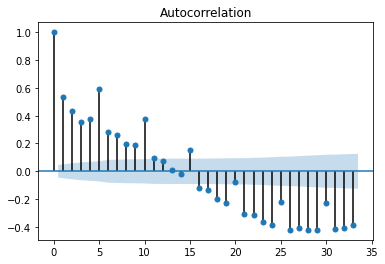

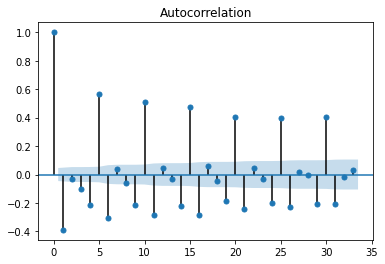

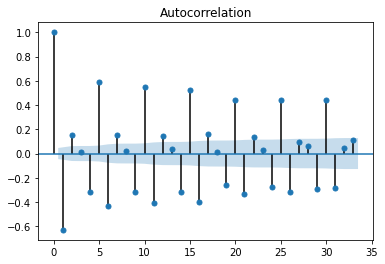

<ipython-input-514-5f447982f271>:67: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  components = seasonal_decompose(olsr_results.resid, freq=1)


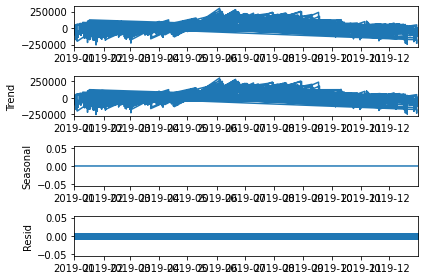

C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 DEMAND   No. Observations:                 1825
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -20886.465
Date:                Sun, 18 Oct 2020   AIC                          41800.930
Time:                        21:27:57   BIC                          41878.053
Sample:                             0   HQIC                         41829.380
                               - 1825                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MAX_TEMP        220.8262    139.574      1.582      0.114     -52.733     494.385
MIN_TEMP       1281.3497    171.876      7.455      0.000     944.480    1618.220
Holiday_Flag  -2.941e+04   3367.140     -8.733      0.000    -3.6e+04   -2.28e+04
Weekened_Flag -3.211e+04   1378.050    -23.300      0.000   -3.48e+04   -2.94e+04
STATE_QLD     -8.694e+04   1759.034    -49.427      0.000   -9.04e+04   -8.35e+04
STATE_SA      -3.162e+05   2169.323   -145.748      0.000    -3.2e+05   -3.12e+05
STATE_TAS     -3.098e+05   2480.027   -124.909      0.000   -3.15e+05   -3.05e+05
STATE_VIC     -1.413e+05   1451.133    -97.360      0.000   -1.44e+05   -1.38e+05
ar.L1            -0.1819      0.136     -1.339      0.181      -0.448       0.084
ma.L1            -0.5235      0.144     -3.638      0.000      -0.806      -0.241
ma.L2            -0.2280      0.095     -2.411      0.016      -0.413      -0.043
ma.L3            -0.3540      0.026    -13.699      0.000      -0.405      -0.303
ma.L4             0.1075      0.044      2.419      0.016       0.020       0.195
sigma2         5.415e+08      0.107   5.08e+09      0.000    5.42e+08    5.42e+08
===================================================================================
Ljung-Box (Q):                      556.69   Jarque-Bera (JB):               501.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.86
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.78e+25. Standard errors may be unstable.
"""

In [514]:
# MERGE DATA- MODEL 1: Daily
# Temp_daily
Temp_daily_Max = pd.read_csv(Link + "\\" + 'Temp_daily_Max.csv')
Temp_daily_Min = pd.read_csv(Link + "\\" + 'Temp_daily_Min.csv')
#Merge1
Merge1 = pd.merge(left =Temp_daily_Max, right=Temp_daily_Min, how ="left", left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])
# Demand_Daily
Demand_daily = pd.read_csv(Link + "\\" + 'Demand_Daily.csv')
#Merge2
Merge2 = pd.merge(left=Demand_daily, right=Merge1, how = "left", left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])
# Holiday_Flag daily
Holiday_daily = pd.read_csv(Link + "\\" + 'Hoilidays.csv')
#Merge3
Merge3 = pd.merge(left=Merge2, right=Holiday_daily, how='left', left_on= ['YEAR','MONTH', 'DAY', 'STATE'], right_on = ['YEAR','MONTH', 'DAY', 'STATE'])
# Weekend day flag
Merge3['DayOfWeek'] = pd.to_datetime(Merge3["DATE"]).dt.day_name(locale = 'English')

# Put Holiday_Flag 0 for other values, put Weekend day flag
Merge3["Holiday_Flag"].fillna(0, inplace= True)
Merge3["Weekened_Flag"]= 0
Merge3.loc[Merge3['DayOfWeek'] == 'Saturday', 'Weekened_Flag'] = 1
Merge3.loc[Merge3['DayOfWeek'] == 'Sunday', 'Weekened_Flag'] = 1

# Filter data for Year 2019 n& columns for model
Merge3.drop(['DayOfWeek'], axis='columns', inplace = True)
Merge = Merge3[(Merge3.YEAR == 2019)]
MergeTest = Merge3[(Merge3.YEAR == 2020)]
# Dummy Variables for State
cols = ['STATE']
MD_Daily =pd.get_dummies(Merge, columns=cols, drop_first=True) 
MD_Test = pd.get_dummies(MergeTest, columns=cols, drop_first=True) 

MD_Daily['DateTimeIndex']= pd.to_datetime(MD_Daily['DATE'])
MD_Daily = MD_Daily.set_index(keys=['DateTimeIndex'])

MD_Test['DateTimeIndex']= pd.to_datetime(MD_Test['DATE'])
MD_Test = MD_Test.set_index(keys=['DateTimeIndex'])

Y_train = MD_Daily['DEMAND']
Y_test = MD_Test['DEMAND']

X_train = MD_Daily.drop(['DEMAND','MONTH', 'YEAR', 'DAY','DATE'] , axis='columns')
X_test = MD_Test.drop(['DEMAND', 'MONTH', 'YEAR', 'DAY', 'DATE'], axis = 'columns')

# RUN - MODEL1
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from matplotlib import pyplot as plt

olsr_results = sm.OLS(Y_train.astype(float), X_train.astype(float)).fit()
olsr_results.summary()

import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

olsr_resid_diff_1 = olsr_results.resid.diff()
olsr_resid_diff_1 = olsr_resid_diff_1.dropna()
tsa.plot_acf(olsr_resid_diff_1, alpha=0.05)
plt.show()

olsr_resid_diff_2 = olsr_resid_diff_1.diff()
olsr_resid_diff_2 = olsr_resid_diff_2.dropna()
tsa.plot_acf(olsr_resid_diff_2, alpha=0.05)
plt.show()

components = seasonal_decompose(olsr_results.resid, freq=1)
components.plot()
plt.show()

sarimax_model = ARIMA(endog=Y_train, exog=X_train,order=(1,1,4))
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

C:\Users\raman\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


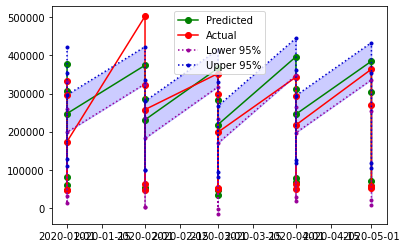

In [517]:
# # MODEL STATISTICS
predictions = sarimax_results.get_forecast(steps=24, exog=X_test[:24])
predictions.summary_frame()


predicted, = plt.plot(X_test[:24].index, predictions.summary_frame()['mean'], 'go-', label='Predicted')
actual, = plt.plot(X_test[:24].index, Y_test[:24], 'ro-', label='Actual')
lower, = plt.plot(X_test[:24].index, predictions.summary_frame()['mean_ci_lower'], color='#990099', marker='.', linestyle=':', label='Lower 95%')
upper, = plt.plot(X_test[:24].index, predictions.summary_frame()['mean_ci_upper'], color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
plt.fill_between(X_test[:24].index, predictions.summary_frame()['mean_ci_lower'], predictions.summary_frame()['mean_ci_upper'], color = 'b', alpha = 0.2)
plt.legend(handles=[predicted, actual, lower, upper])
plt.show()

In [498]:
# MERGE DATA- MODEL 2: Monthly
# Datsets: Unemployment, employment & Population, Temp_Monthly, Demand_Monthly, Holidays_count_Monthly, Weekeend days_count Monthly
# RUN - MODEL2
# MODEL STATISTICS
# GRAPHS